<a href="https://colab.research.google.com/github/malldisaesar/tugasw10/blob/main/ImgClassWeek11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 Daun/              'Salinan dari Untitled0.ipynb'   Untitled1.ipynb
 ImgClassW11.ipynb   Untitled0.ipynb


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("Loading Gus....")
imagePaths = paths.list_images("Daun")
data = []
labels = []

Loading Gus....


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08',

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [10]:
# perform a training and testing split, using 80% of the data for
# training and 20% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.20, shuffle=True)
print(trainX.shape)
print(testX.shape)

(476, 128, 128, 3)
(120, 128, 128, 3)


In [46]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(75, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(25, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)             

In [47]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [48]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
15/15 [==============================] - 4s 277ms/step - loss: 1.6171 - accuracy: 0.2080 - val_loss: 1.6014 - val_accuracy: 0.2250
Epoch 2/25
15/15 [==============================] - 4s 267ms/step - loss: 1.5541 - accuracy: 0.3340 - val_loss: 1.5164 - val_accuracy: 0.2917
Epoch 3/25
15/15 [==============================] - 4s 265ms/step - loss: 1.4215 - accuracy: 0.3697 - val_loss: 1.4092 - val_accuracy: 0.4000
Epoch 4/25
15/15 [==============================] - 4s 270ms/step - loss: 1.2510 - accuracy: 0.4412 - val_loss: 1.2927 - val_accuracy: 0.4250
Epoch 5/25
15/15 [==============================] - 4s 272ms/step - loss: 1.0847 - accuracy: 0.5273 - val_loss: 1.1549 - val_accuracy: 0.4500
Epoch 6/25
15/15 [==============================] - 4s 269ms/step - loss: 0.8565 - accuracy: 0.6807 - val_loss: 0.9477 - val_accuracy: 0.6583
Epoch 7/25
15/15 [==============================] - 4s 271ms/step - loss: 0.7754 - accuracy: 0.6954 - val_loss: 0.7704 - val_accuracy: 0.7417
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


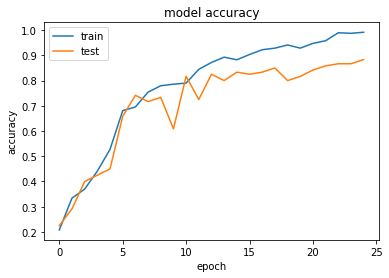

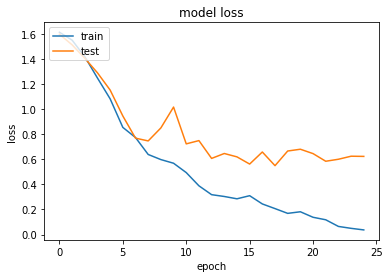

In [49]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_07       0.95      0.83      0.88        23
      GMB_08       0.88      0.93      0.90        15
      GMB_09       0.93      1.00      0.96        27
      GMB_10       0.95      0.80      0.87        25
      GMB_11       0.76      0.87      0.81        30

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.88      0.88       120



In [52]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [53]:
import cv2
import matplotlib.pyplot as plt
image1='Daun_test.jpg'

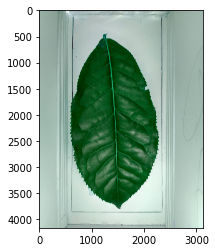

In [54]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [57]:
image_testing = Image.open('Daun_test.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [58]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)
